## **Part 6: Data Visualization**

In [135]:
# importing necessary libraries
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring connection to `library_db` database
USER = "postgres"
PASS = quote_plus("@user56") 
HOST = "localhost"
PORT = "5432"
DB = "library_db"

engine = create_engine(f'postgresql://{USER}:{PASS}@{HOST}:{PORT}/{DB}')


In [136]:
# loading the data and testing the connection
authors = pd.read_sql("SELECT * FROM Authors", engine)
books = pd.read_sql("SELECT * FROM Books", engine)
book_orders = pd.read_sql("SELECT * FROM BookOrders", engine)
members = pd.read_sql("SELECT * FROM Members", engine)
borrow_history = pd.read_sql("SELECT * FROM BorrowHistory", engine)
departments = pd.read_sql("SELECT * FROM Departments", engine)
library_staff = pd.read_sql("SELECT * FROM LibraryStaff", engine)

### **V1.** Bar chart showing the top 10 authors by number of books written

In [137]:
# sorting by number_of_books_written in descending order
no_of_books_written = authors.groupby("author_name")["number_of_books_written"].sum().sort_values( ascending=False).head(10)
no_of_books_written

author_name
Isaac Asimov         500
Agatha Christie       85
Stephen King          64
Philip K. Dick        44
Terry Pratchett       41
Neil Gaiman           35
Arthur C. Clarke      33
Paulo Coelho          30
Brandon Sanderson     28
Ray Bradbury          27
Name: number_of_books_written, dtype: int64

<Axes: title={'center': 'Total number of books by authors'}, xlabel='authors', ylabel='no_of_books_written'>

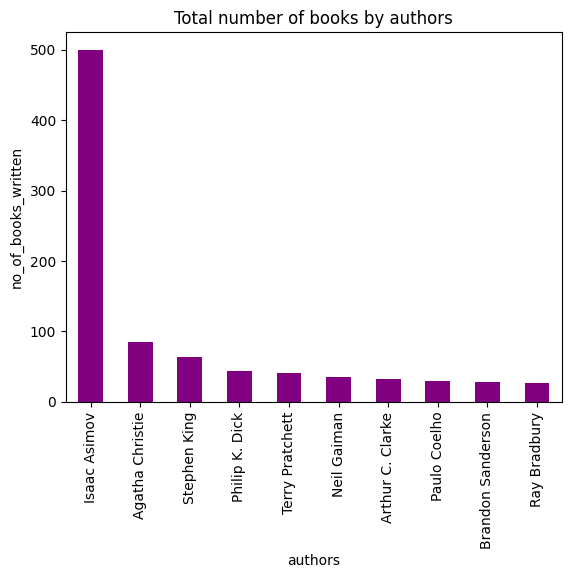

In [138]:
# plotting the bar chart
no_of_books_written.plot(kind="bar", xlabel="authors", ylabel="no_of_books_written", title = "Total number of books by authors", color="purple")

### **V2.** Pie chart displaying the distribution of members by membership type



In [139]:
membership = members["type_of_membership"].value_counts().sort_values(ascending = True)
membership

type_of_membership
student     12
premium     23
standard    40
Name: count, dtype: int64

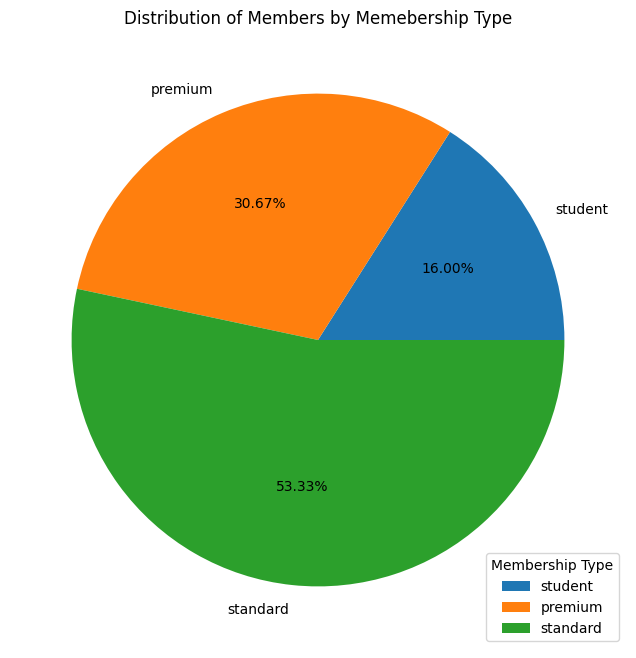

In [163]:
plt.figure(figsize=(10,8))
plt.pie(membership.values, labels= membership.index, autopct= "%1.2f%%")
plt.title("Distribution of Members by Memebership Type")
plt.legend(title="Membership Type", loc="lower right")
plt.show()


### **V3.** Line graph showing monthly borrowing trends over time


In [141]:
# merging the borrow_histroy table and books table
books_borrow_history = pd.merge(books,borrow_history, on = "book_id", how = "inner")
books_borrow_history.head()

,book_id,title,author_id,genre,date_of_publication,publisher,isbn,language_,available_copies,age_rating,borrowed_id,member_id,borrow_date,return_date
0,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,1,1,2024-01-15,2024-02-05
1,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,55,50,2024-03-22,None
2,1,The Handmaid's Tale,1,Dystopian Fiction,1985-08-01,McClelland & Stewart,9780771008795,English,3,16+,144,64,2024-03-28,None
3,2,Cat's Eye,1,Literary Fiction,1988-09-01,McClelland & Stewart,9780771008801,English,2,16+,2,3,2024-02-10,2024-03-02
4,2,Cat's Eye,1,Literary Fiction,1988-09-01,McClelland & Stewart,9780771008801,English,2,16+,60,55,2024-03-28,None


In [142]:
# converting borrow_date to pandas datetime
books_borrow_history["borrow_date"] = pd.to_datetime(books_borrow_history["borrow_date"])

In [143]:
# Extracting the borrow year and month from the borrow_date column
books_borrow_history["borrow_year"] = books_borrow_history["borrow_date"].dt.year
books_borrow_history["borrow_month"] = books_borrow_history["borrow_date"].dt.month_name()

In [144]:
# Grouping and counting borrows per month
monthly_trends = (books_borrow_history.groupby(["borrow_year","borrow_month"]).size().reset_index(name="total_borrowed_books").sort_values( by="total_borrowed_books", ascending= True))
monthly_trends

,borrow_year,borrow_month,total_borrowed_books
1,2024,January,32
0,2024,February,58
2,2024,March,60


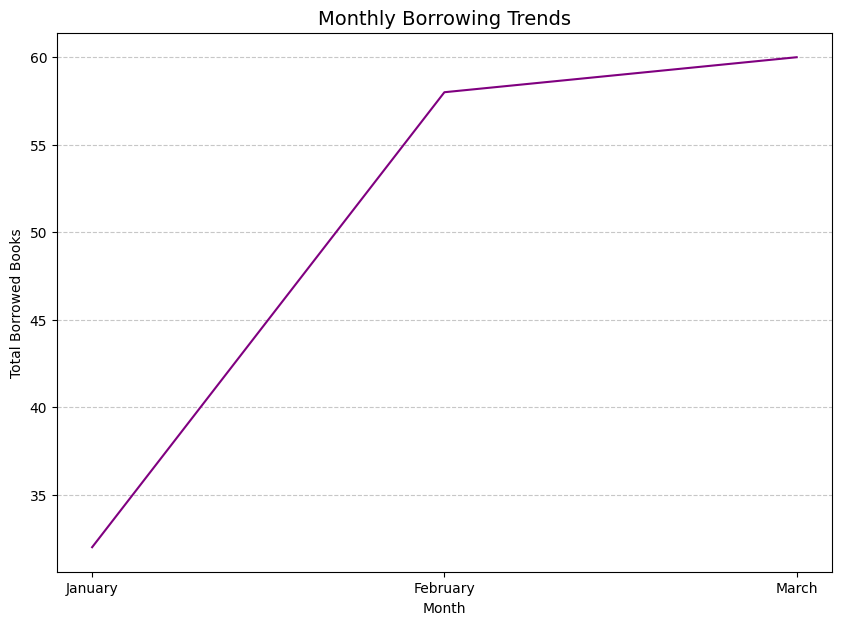

In [164]:
# Plotting monthly borrowing trends over time
plt.figure(figsize=(10, 7))
plt.plot(monthly_trends["borrow_month"], monthly_trends["total_borrowed_books"], color="purple")

plt.title("Monthly Borrowing Trends", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Borrowed Books")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



### **V4.** Horizontal bar chart of book genres by total available copies


In [147]:
# Show the total number of available book copies per genre.
total_copies_per_genre = (books.groupby("genre")["available_copies"]).sum().reset_index(name="total_available_copies").sort_values(by="total_available_copies", ascending=True)
total_copies_per_genre

,genre,total_available_copies
2,Essay,1
0,Children's Literature,2
5,Historical Mystery,2
13,Post-apocalyptic,2
18,Travel,3
17,Short Stories,3
15,Science,5
14,Romance,6
1,Dystopian Fiction,6
8,Magical Realism,7


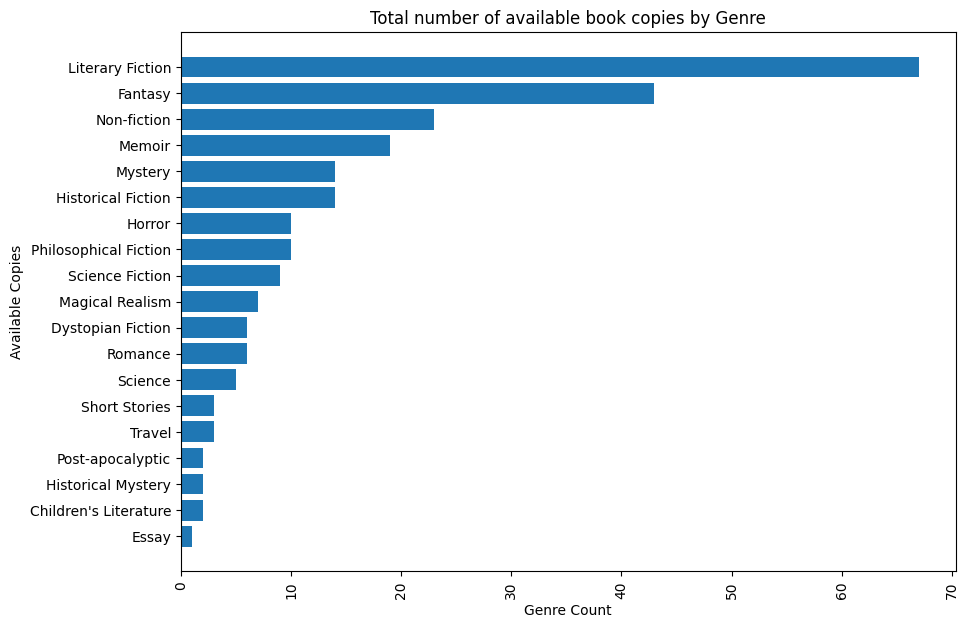

In [148]:
# plotting the bar chart of total number of available book copies per genre.
plt.figure(figsize=(10, 7))
plt.barh(total_copies_per_genre["genre"], total_copies_per_genre["total_available_copies"])
plt.xlabel("Genre Count")
plt.ylabel("Available Copies")
plt.title("Total number of available book copies by Genre")
plt.xticks(rotation = 90)
plt.show()


### **V5.** Heatmap or stacked bar chart showing book orders by fulfillment status and supplier

In [149]:
book_orders.columns

Index(['order_id', 'order_date', 'book_id', 'cost', 'quantity', 'supply_date',
       'fulfilment_status', 'supplier_name'],
      dtype='object')

In [150]:
orders = book_orders.groupby(["fulfilment_status","supplier_name"]).size().sort_values(ascending = True)
orders

fulfilment_status  supplier_name           
fulfilled          Agatha Christie Ltd         1
                   Algonquin Books             1
                   Baker & Taylor              1
                   Bantam Spectra              1
                   Bobbs-Merrill               1
                   Bompiani                    1
                   Broadway Books              1
                   Cassell                     1
                   Editorial La Oveja Negra    1
                   Colin Smythe                1
                   Collins Crime Club          1
                   DC Comics                   1
                   Harper & Row                1
                   Gollancz                    1
                   Farrar Straus Giroux        1
                   Faber & Faber               1
                   Jonathan Cape               1
                   Kodansha                    1
                   Putnam                      1
                   Pengui

In [151]:

# Group and count number of orders per fulfilment status and supplier name
orders = (book_orders.groupby(["fulfilment_status", "supplier_name"]).size().reset_index(name="order_count"))


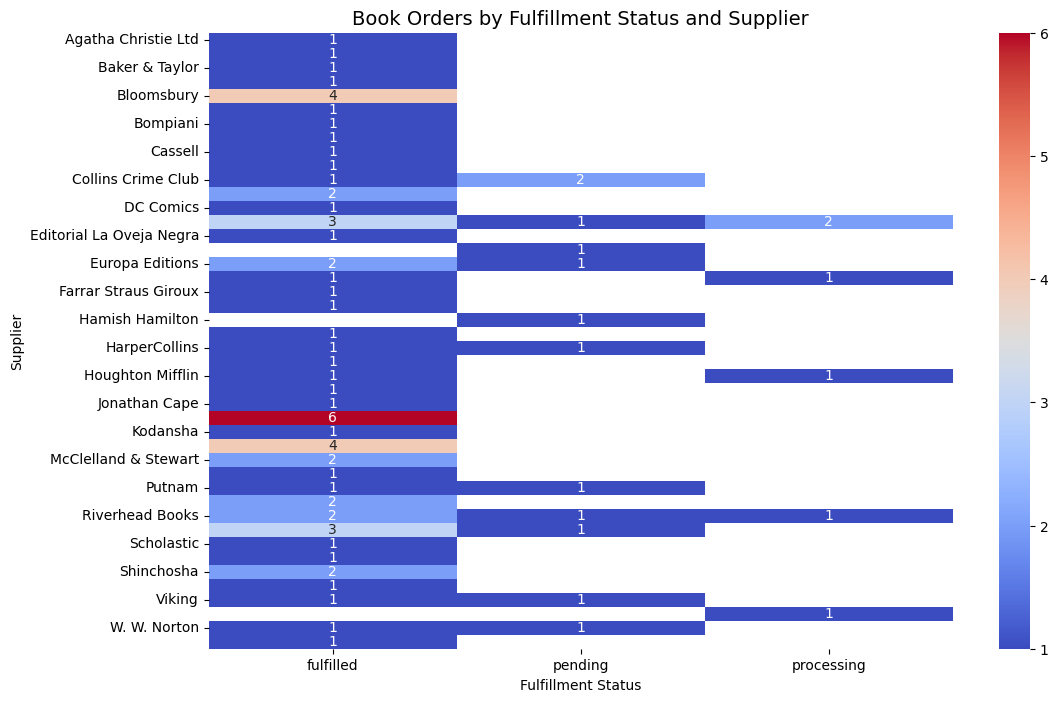

In [152]:
# Plot heatmap of orders per fulfilment status and supplier name
group_book_orders = orders.pivot(index="supplier_name", columns="fulfilment_status", values="order_count")
plt.figure(figsize=(12, 8))
sns.heatmap(group_book_orders, annot=True, cmap='coolwarm')
plt.title("Book Orders by Fulfillment Status and Supplier", fontsize=14)
plt.ylabel("Supplier")
plt.xlabel("Fulfillment Status")
plt.show()


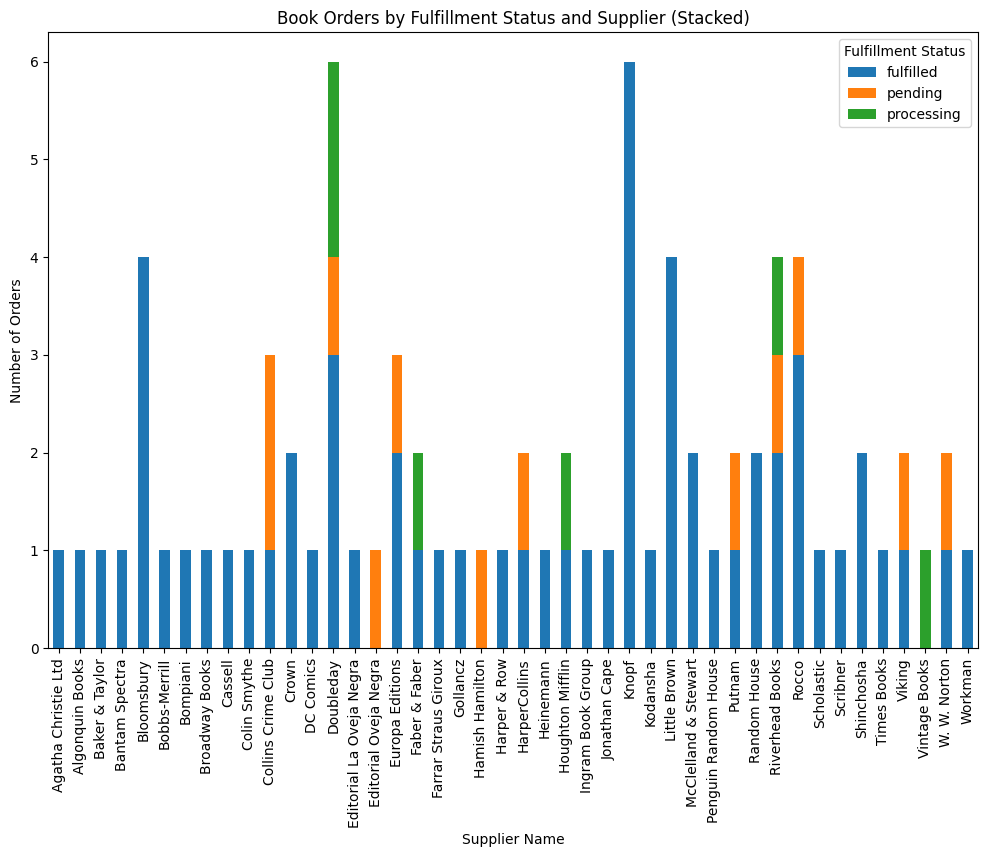

In [153]:
# Plot stacked bar chart of orders per fulfilment status and supplier name
group_book_orders.plot(kind="bar",stacked=True,figsize=(12,8))

plt.title("Book Orders by Fulfillment Status and Supplier (Stacked)")
plt.xlabel("Supplier Name")
plt.ylabel("Number of Orders")
plt.legend(title="Fulfillment Status")
plt.show()